In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Contours
    Contour는 동일한 색 또는 동일한 픽셀값(강도, intensity)을 가지고 있는 영역의 경계선 정보이다. 물체의 윤곽선, 외형을 파악하는데 사용된다. openCV의 findContour 함수로 이미지의 Contour 정보와 Contour 계층구조(hierarchy) 정보를 출력한다. 흑백 이미지 또는 이진화된 이미지에만 적용할 수 있다.
    
    findContours 함수로 반환받는 Contour 값은 Contour를 구성하는 점들로 이루어진 배열의 리스트로 len(contours)로는 hierarchy의 갯수를, len(contours[i])로는 각각의 hierarchy를 이루는 Contour 점의 갯수를 알 수 있다. 이 때, 같은 리스트로 이루어진 점들은 같은 Hierarchy에 묶여 있다고 볼 수 있다.
    
    여기서 hierarchy는 index와 -1로 이루어진 Contour * 4 크기의 행렬로 각각의 index에 해당하는 원소는 다음을 의미힌다.
    - 0 : 동일 계층에서 다음 Contour의 index, 없으면 -1
    - 1 : 동일 계층에서 이전 Contour의 index, 없으면 -1
    - 2 : 바로 밑 자식 Contour의 index, 가장 하위의 Contour이면 -1
    - 3 : 바로 위 부모 Contour의 index, 가장 상위의 Contour이면 -1   

In [2]:
def onChange(x):
    return int(x)

def findContours():
    img = cv2.imread('hangul.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    cv2.namedWindow('contours')
    cv2.createTrackbar('index', 'contours', 0, 16, onChange)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    while True:
        img_copy = img.copy()

        index = cv2.getTrackbarPos('index', 'contours')
        cnt = contours[index]
        cv2.drawContours(img_copy, [cnt], 0, (255, 255, 0), 2)        
        cv2.imshow('contours', img_copy)
            
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
    cv2.destroyAllWindows()

In [4]:
findContours()

---
# Contour features
## 이미지 모멘트 (Image Moments)
    이미지 모멘트는 객체의 무게중심, 객체의 면적 등과 같은 특성을 계산할 때 유용하다. Contour에 대한 특징값을 뜻하며, openCV에서는 cv2.moments 함수를 통해 이미지 모멘트를 계산하고 이를 딕셔너리 형태로 담아 리턴한다. 반환하는 모멘트는 총 24개로 10개의 위치 모멘트, 7개의 중심 모멘트, 7개의 정규화된 중심 모멘트로 이루어져 있다.
    - 공간 모멘트 (Spatial Moments) : m00, m10, m01, m20, m11, m02, m30, m21, m12, m03
    - 중심 모멘트 (Central Moments) : mu20, mu11, mu02, mu30, mu21, mu12, mu03
    - 평준화된 중심 모멘트 (Central Normalized Moments) : nu20, nu11, nu02, nu30, nu21, nu12, nu03
    
## cv2.moments(array [, binaryImage]) → retval
    다각형이나 레스터화된 모양의 이미지의 공간모멘트, 중심모멘트, 평준화된 중심 모멘트를 3차까지 계산한다. 이때 인자로 받는 배열, array는 2차원 포인터로 이루어진 배열이어야 한다. (이때, findContours 함수로 반환받은 contours의 데이터형태는 4차원 배열로, 그 안의 각각의 요소는 같은 hierarchy로 묶인 2차원 포인터들의 배열로 이루어져 있다. 따라서 주로 findContours 함수로 반환받은 Contours의 요소를 array의 인자로 전달한다.) 그러면 moments 함수는 앞서 소개한 모든 모멘트를 계산해 Dictionary 형태로 묶어 반환한다. 이렇게 얻어진 모멘트를 기반으로 이미지 혹은 도형의 다양한 특성들을 구할 수 있다.

dict_items([('m00', 5575.5), ('m10', 383803.6666666666), ('m01', 279202.0), ('m20', 29970200.416666664), ('m11', 19929676.291666664), ('m02', 18577736.75), ('m30', 2509172870.8), ('m21', 1549590762.4833333), ('m12', 1341590241.35), ('m03', 1482037060.7), ('mu20', 3550102.748874046), ('mu11', 710099.3316331841), ('mu02', 4596254.048179535), ('mu30', -42662429.13257408), ('mu21', -48977500.64838508), ('mu12', -8374029.154776275), ('mu03', 91398032.52438426), ('nu20', 0.11420188766473786), ('nu11', 0.022842911836199218), ('nu02', 0.1478551257862252), ('nu30', -0.018379598899828615), ('nu21', -0.021100224139513266), ('nu12', -0.003607654326526446), ('nu03', 0.03937561016067528)])


(-0.5, 129.5, 127.5, -0.5)

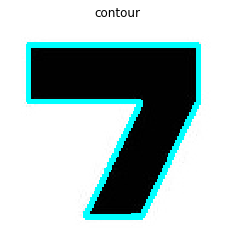

In [6]:
img = cv2.imread('cropped.jpg')
img2 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 255), 2)

c0 = contours[0]
M = cv2.moments(c0)
print(M.items())

plt.title('contour')
plt.imshow(img)
plt.axis('off')

## 1. Centroid
    이렇게 얻은 Moments로 대표적으로 해당 Contours의 중심점을 다음과 같은 방법으로 구할 수 있다.
    
    C_x = M_10 / M_00
    C_y = M_01 / M_00

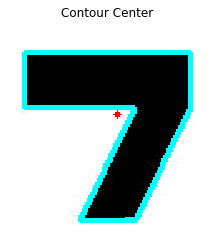

In [5]:
img_copy = img.copy()
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.circle(img_copy, (cx, cy), 2, (255, 0, 0), -1)

plt.imshow(img_copy)
plt.title("Contour Center")
plt.axis("off")
plt.show()

## 2. Extream Point
    Moments와는 별개로 해당 Contour의 최남단, 최북단, 최동단, 최서단을 다음과 같이 구할 수 있다.

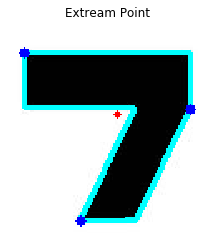

In [6]:
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

cv2.circle(img_copy, (leftmost[0], leftmost[1]), 3, (0, 0, 255), -1)
cv2.circle(img_copy, (rightmost[0], rightmost[1]), 3, (0, 0, 255), -1)
cv2.circle(img_copy, (bottommost[0], bottommost[1]), 3, (0, 0, 255), -1)
cv2.circle(img_copy, (topmost[0], topmost[1]), 3, (0, 0, 255), -1)
        
plt.imshow(img_copy)
plt.title("Extream Point")
plt.axis("off")
plt.show()

## 3. Contour Area
    Contour Area는 폐곡선 형태의 Contour로 둘러쌓인 부분의 면적을 의미한다. 해당 Contour의 면적은 Moments에서 "m00"을 통해 구할 수 있다. 마찬가지로 contourArea 함수를 통해 구할 수도 있다.

## cv2.contourArea(contour [, oriented]) → retval
    위 함수는 Contour의 면적을 구하는 함수이다. 모멘트와 비슷하게 Green 공식(미적분에서 적분을 이용해 면적을 구하는 공식)을 이용하여 이 면적을 구한다. 그러므로 drawContours나 fillPoly 함수를 사용해 윤곽선을 그리는 경우, 반환되는 면적과 0이 아닌 픽셀들의 수는 다를 수도 있다. 또한 이 함수는 주로 교차되어 있는 Contours에 대해서는 잘못된 결과를 반환할 수도 있다. 2차원 포인터의 배열을 contour의 인자로 입력받는다.

In [7]:
M["m00"]

5575.5

In [8]:
cv2.contourArea(c0)

5575.5

## 4. Contour Perimeter
    폐곡선 형태의 Contour 둘레의 길이를 구하거나 폐곡선이 아닌 곡선의 길이를 계산하는 함수이다. 이때, 폐곡선이란 선의 양쪽 끝이 연결되어 있어 도형을 이루며 어느 부분이 시작점이고 끝점인지 알 수 없는 곡선을 의미한다, 양끝이 열려 있어 도형을 이루지 않는 곡선을 폐곡선이라 하지 않는다.
    
## cv2.arcLength(curve, closed) → retval
    첫번째 인자로 Moments 함수나 contourArea 함수와 마찬가지로 2차원 포인터의 배열을 curve의 인자로 입력받는다. 두번째 인자로 길이를 구하고자 하는 곡선이 폐곡선인지 아닌지를 boolean 형태로 입력받는다. 폐곡선일 경우 True를 인자로 전달하고, 아닐 경우 False를 인자로 전달하면 된다.

In [7]:
cv2.arcLength(c0, closed=True)

429.23758828639984

In [8]:
cv2.arcLength(c0, closed=False)

329.23758828639984

---
# Find Contour Features with trackbar

In [2]:
def onChange(x):
    return int(x)

def ContoursFeature():
    img = cv2.imread('hangul.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    cv2.namedWindow('contours')
    cv2.createTrackbar('index', 'contours', 0, 16, onChange)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    while True:
        img_copy = img.copy()

        index = cv2.getTrackbarPos('index', 'contours')
        cnt = contours[index]
        cv2.drawContours(img_copy, [cnt], 0, (0, 255, 255), 3)
        
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
        rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
        topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
        bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
        cv2.circle(img_copy, (cx, cy), 3, (255, 0, 0), -1)
        cv2.circle(img_copy, (leftmost[0], leftmost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (rightmost[0], rightmost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (bottommost[0], bottommost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (topmost[0], topmost[1]), 3, (0, 0, 255), -1)
        
        print("-----------------------------")
        print((index+1), "번째 Contour의 면적 : ", cv2.contourArea(cnt))
        print((index+1), "번째 Contour의 길이 : ", cv2.arcLength(cnt, closed=True))
        
        cv2.imshow('contours', img_copy)
            
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
    print("-----------------------------")    
    cv2.destroyAllWindows()

In [3]:
ContoursFeature()

-----------------------------
1 번째 Contour의 면적 :  9171.5
1 번째 Contour의 길이 :  356.89444279670715
-----------------------------
4 번째 Contour의 면적 :  271.5
4 번째 Contour의 길이 :  83.41421353816986
-----------------------------
2 번째 Contour의 면적 :  8418.5
2 번째 Contour의 길이 :  501.899494767189
-----------------------------
4 번째 Contour의 면적 :  271.5
4 번째 Contour의 길이 :  83.41421353816986
-----------------------------
4 번째 Contour의 면적 :  271.5
4 번째 Contour의 길이 :  83.41421353816986
-----------------------------
4 번째 Contour의 면적 :  271.5
4 번째 Contour의 길이 :  83.41421353816986
-----------------------------
6 번째 Contour의 면적 :  7331.0
6 번째 Contour의 길이 :  542.2497808933258
-----------------------------
6 번째 Contour의 면적 :  7331.0
6 번째 Contour의 길이 :  542.2497808933258
-----------------------------
7 번째 Contour의 면적 :  7299.0
7 번째 Contour의 길이 :  542.2497808933258
-----------------------------
7 번째 Contour의 면적 :  7299.0
7 번째 Contour의 길이 :  542.2497808933258
-----------------------------
7 번째 Contour의 면적 :  7299